In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

Data comes from https://data.humdata.org/dataset/cod-ab-vnm?
 with Creative Commons Attribution for Intergovernmental Organisations (CC BY-IGO) (https://data.humdata.org/faqs/licenses)
 license

In [55]:
data = gpd.read_file("~/Downloads/vnm_adm_gov_20201027/vnm_admbnda_adm1_gov_20201027.shp")

Text(0.5, 1.0, 'Vietnam boundary')

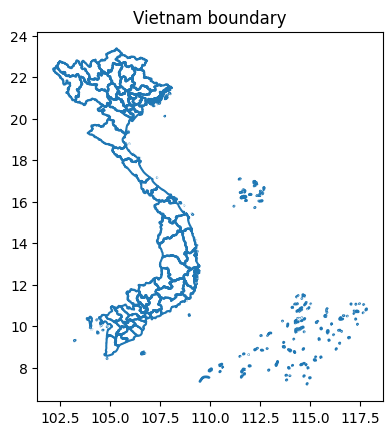

In [59]:
data.boundary.plot()
plt.title("Vietnam boundary")

Get area in squared kilometers unit

In [61]:
excel_file = pd.read_excel("~/Downloads/vnm_adminboundaries_tabulardata.xlsx",
                        sheet_name="ADM1"
                        )
excel_file.head(1)

,ADM1_EN,ADM1_VI,ADM1_PCODE,ADM1_REF,ADM1ALT1_EN,ADM1ALT2_EN,ADM1ALT1_VI,ADM1ALT2_VI,ADM0_EN,ADM0_VI,ADM0_PCODE,DATE,VALIDON,VALIDTO,AREA_SQKM
0,An Giang,An Giang,VN805,NaN,NaN,NaN,NaN,NaN,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaN,3535.969971


In [62]:
join_data = data.merge(excel_file[[
    'ADM1_EN', 'ADM1_VI', 'ADM1_PCODE', 'AREA_SQKM'
]], on = ['ADM1_EN', 'ADM1_VI', 'ADM1_PCODE'],
                       how='left')

Text(0.5, 1.0, 'Vietnam area by provinces')

<Figure size 1500x1000 with 0 Axes>

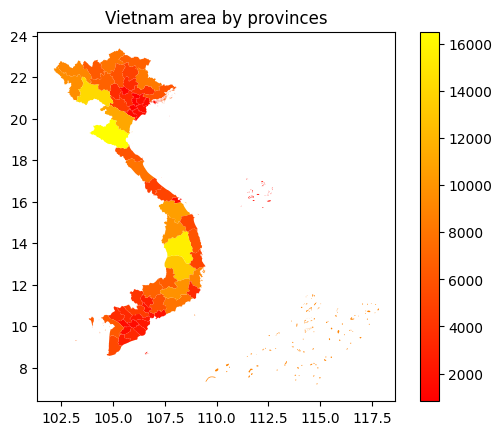

In [65]:
fig = plt.figure(figsize=(15,10))
join_data.plot(
    aspect=1,
    column='AREA_SQKM',
    legend=True,
    cmap='autumn',
)
plt.title("Vietnam area by provinces")
